El orden obtenido es n = 2
Función de transferencia del filtro Chebyshev:
Numerador:  [16420899.35090685        0.                0.        ]
Denominador:  [1.00000000e+00 5.08000167e+03 9.58572335e+07 2.00550427e+11
 1.55854546e+15]

Secciones de segundo orden (SOS):
[[1.64208994e+07 0.00000000e+00 0.00000000e+00 1.00000000e+00
  3.18442632e+03 6.63208202e+07]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.89557535e+03 2.35000932e+07]]


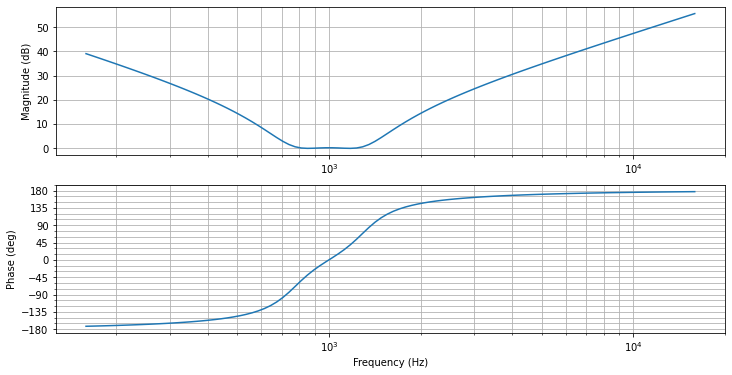

Las Función de Transferencia es: 


                     1.642e+07 s^2
--------------------------------------------------------
s^4 + 5080 s^3 + 9.586e+07 s^2 + 2.006e+11 s + 1.559e+15



In [11]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
from scipy import signal

fp=[800, 1250]    # BANDA DE PASO [Hz]
fs=[200, 5000]    # BANDA DE RECHAZO [Hz]

As=30     # Atenuación en la BANDA DE RECHAZO [dB]
Ap=0.25   # Atenuación en la BANDA DE PASO [dB]

# Convertir frecuencias a radianes por segundo
Wp = 2 * np.pi * np.array(fp)  # Banda de paso [rad/s]
Ws = 2 * np.pi * np.array(fs)  # Banda de rechazo [rad/s]

# Calcular el orden del filtro y frecuencia normalizada
n, Wp_norm = signal.cheb1ord(Wp, Ws, Ap, As, analog=True)
print(f'El orden obtenido es n = {n}')

# Diseñar el filtro Chebyshev Tipo I
num, den = signal.cheby1(n, Ap, Wp_norm, btype='bandpass', analog=True, fs=None)

# Mostrar la función de transferencia
print("Función de transferencia del filtro Chebyshev:")
print("Numerador: ", num)
print("Denominador: ", den)

# Crear la función de transferencia
filtro = signal.TransferFunction(num, den)

# Convertir la función de transferencia en secciones de segundo orden (SOS)
sos = signal.tf2sos(num, den)
print("\nSecciones de segundo orden (SOS):")
print(sos)

FiltroGraf= ctrl.TransferFunction(den,num)

omega = np.logspace(3,5,100)
plt.figure(figsize=(12,6))
ctrl.bode_plot(FiltroGraf,omega,dB=True,Hz=True)
plt.show()

print("Las Función de Transferencia es: \n")
print(ctrl.TransferFunction(num,den))